In [1]:
import matplotlib.pyplot as plt
import os,glob,imp,copy
import numpy as np
import seaborn as sns
import pyslha, copy, pickle
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.rm"] = 'serif'
# plt.rcParams["mathtext.it"] = 'serif:italic'
# plt.rcParams["mathtext.bf"] = 'serif:bold'
# plt.rcParams["mathtext.fontset"] = 'custom'
# plt.rcParams['text.usetex'] = True

In [2]:
def getContour(xpts,ypts,zpts,levels,ylog=False,xlog=False):
    """
    Uses pyplot tricontour method to obtain contour
    curves in a 2D plane.

    :return: A dictionary with a list of contours for each level
    """
    
    fig = plt.figure()
    x = copy.deepcopy(xpts)
    y = copy.deepcopy(ypts)
    z = copy.deepcopy(zpts)
    
    #Use log scale:
    if ylog:
        y = np.log10(y)
    if xlog:
        x = np.log10(x)
    
    CS = plt.tricontour(x,y,z,levels=levels)    
    levelPts = {}
    for il,level in enumerate(CS.levels):
        levelPts[level] = []
        c = CS.collections[il]        
        paths = c.get_paths()
        for path in paths:
            levelPts[level].append(path.vertices)
    plt.close(fig)
    
    #scale back:
    if ylog or xlog:
        for key,ptsList in levelPts.items():
            newList = []
            for pts in ptsList:
                xpts = pts[:,0]
                ypts = pts[:,1]
                if xlog:
                    xpts = 10**xpts
                if ylog:
                    ypts = 10**ypts
                newList.append(np.column_stack((xpts,ypts)))
            levelPts[key] = newList
        
    
    return levelPts

In [3]:
exec(open("./TChiWH_2EqMassAx_EqMassBy.py").read())
data = copy.deepcopy(validationData)
exec(open("./TChiWH_2EqMassAx_EqMassBy_combined.py").read())
dataComb = copy.deepcopy(validationData)

In [4]:
#Get points to compute exclusion curves:
xpts = []
ypts = []
rpts = []
for pt in data:
    if 'error' in pt: continue
    xpts.append(pt['axes']['x'])
    ypts.append(pt['axes']['y'])
    rpts.append(pt['signal']/pt['UL'])
excCurve = getContour(xpts,ypts,rpts,levels=[1.0],ylog=False)

xpts = []
ypts = []
rpts = []
for pt in dataComb:
    if 'error' in pt: continue
    xpts.append(pt['axes']['x'])
    ypts.append(pt['axes']['y'])
    rpts.append(pt['signal']/pt['UL'])
excCurveComb = getContour(xpts,ypts,rpts,levels=[1.0],ylog=False)

In [5]:
#Official curve
excATLAS = np.genfromtxt('Observedlimit1lbb.csv',delimiter=',',skip_header=9,
                       names=True)

In [6]:
print(excATLAS.dtype)

[('MCHARGINO1NEUTRALINO2_GEV', '<f8'), ('MNEUTRALINO1_GEV', '<f8')]


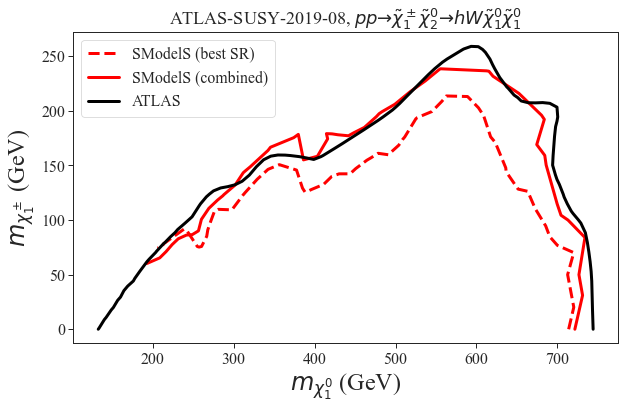

In [7]:
fig = plt.figure(figsize=(9,6))
plt.plot(excCurve[1.0][0][:,0],excCurve[1.0][0][:,1],
         label='SModelS (best SR)',
         linewidth=3,linestyle='--',color='red')

plt.plot(excCurveComb[1.0][0][:,0],excCurveComb[1.0][0][:,1],
         label='SModelS (combined)',
         linewidth=3,linestyle='-',color='red')

plt.plot(excATLAS['MCHARGINO1NEUTRALINO2_GEV'],excATLAS['MNEUTRALINO1_GEV'],label='ATLAS',
         linewidth=3,linestyle='-',color='black')

plt.ylabel(r'$m_{\chi_1^\pm}$ (GeV)',fontsize=24)
plt.xlabel(r'$m_{\chi_1^0}$ (GeV)',fontsize=24)
plt.title(r'ATLAS-SUSY-2019-08, $p p \to \tilde{\chi}_1^\pm \tilde{\chi}_2^0 \to h W \tilde{\chi}_1^0 \tilde{\chi}_1^0$',
          fontsize=18)
plt.tight_layout()
plt.legend()
plt.savefig('pyhfExample.pdf')
plt.show()